<a href="https://colab.research.google.com/github/HiraY32/HiraY32/blob/main/ML_session_24%2C25_27%3B28_5_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3,suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
filepath='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
pd.read_csv(filepath)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [ ]:
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model year','Origin']

In [ ]:
AM_dt=pd.read_csv(filepath,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)
AM_dt

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
# clean data
AM_dt=AM_dt.dropna()

In [ ]:
# convert categorical 'Origin' data into one-hot data
origin=AM_dt.pop('Origin')
AM_dt['USA']=(origin==1)*1
AM_dt['Europe']=(origin==2)*1
AM_dt['Japan']=(origin==3)*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
AM_dt

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [ ]:
#spliting the data into train & test
train_AM_dt=AM_dt.sample(frac=0.8,random_state=0)
test_AM_dt=AM_dt.drop(train_AM_dt.index)

In [ ]:
print(AM_dt.shape,train_AM_dt.shape,test_AM_dt.shape)
train_AM_dt.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# split features from labels
train_features=train_AM_dt.copy()
test_features=test_AM_dt.copy()
train_labels=train_features.pop('MPG')
test_labels=test_features.pop('MPG')

In [ ]:
def plot(feature,x=None,y=None):
  plt.figure(figsize=(7,4))
  plt.scatter(train_features[feature],train_labels,label='Data')
  if x is not None and y is not None:
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlable(feature)
    plt.ylable('MPG')
    plt.legend()


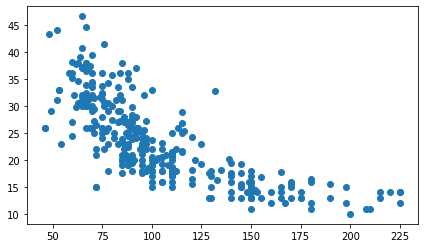

In [ ]:
plot('Horsepower')

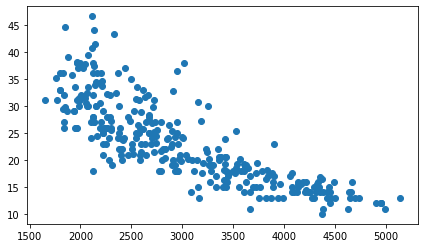

In [ ]:
plot('Weight')

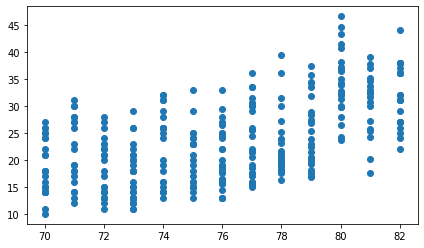

In [ ]:
plot('Model year')

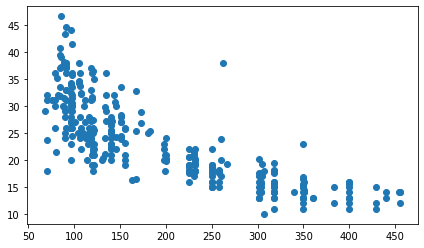

In [ ]:
plot('Displacement')

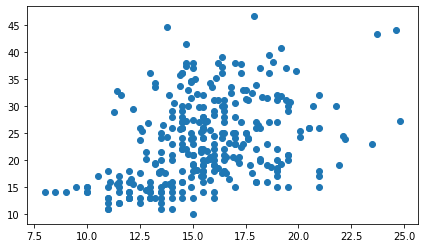

In [ ]:
plot('Acceleration')

In [ ]:

print(train_AM_dt.describe().transpose()[['mean','std']])

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712


In [ ]:
#Normalization
normalizer=preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [ ]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first=np.array(train_features[:1])
print('First example',first)
print('Normalized:',normalizer(first).numpy())

First example [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [ ]:
feature='Horsepower'
single_feature=np.array(train_features.shape)
print(single_feature.shape,train_features.shape)


(2,) (314, 9)
